# Анализ данных

https://www.kaggle.com/competitions/titanic

Для начала откроем таблицу, взглянем на их содержание. Сразу можно отметить, что *gender_submission* - это пример результата, в котором выжили только все женщины.

In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train_original = df_train.copy()
df_test = pd.read_csv('test.csv')
df_test_original = df_test.copy()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Мы видим большое количество пропусков в *Age*, *Cabin* и всего 2 в *Embarked*. Нам придётся заполнять чем-то эти пропуски, потому что их много. Можно было бы выкинуть строки с пропусками в *Embarked* и только.
<br>
Пока что выведем несколько графиков, отображающих зависимость таргета от признаков. Это должно помочь понять какие признаки важны, как заполнять пропуски, какие признаки можно создать, если наблюдается какая-то зависимость, не отраженная в таблице.

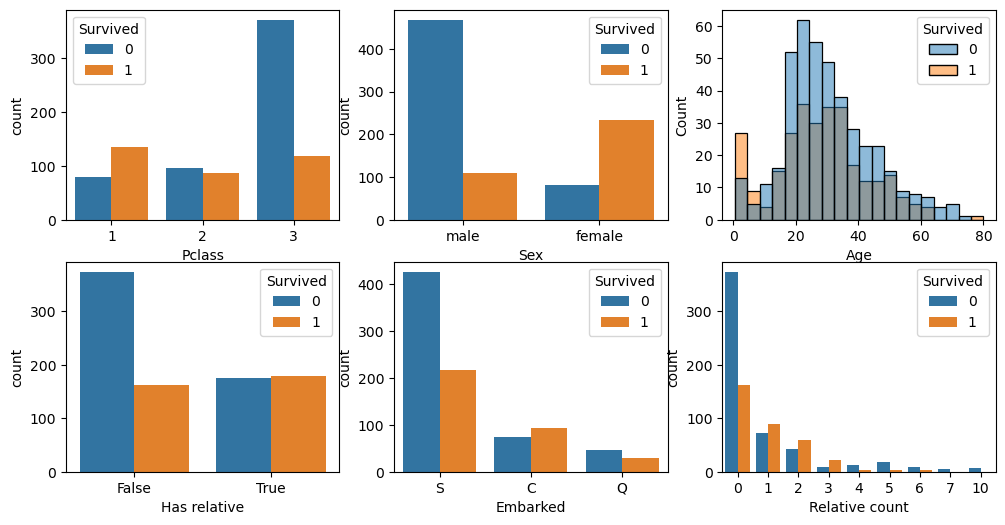

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=axes[0, 0])
sns.countplot(data=df_train, x='Sex', hue='Survived', ax=axes[0, 1])
sns.histplot(data=df_train, x='Age', hue='Survived', bins=20, kde=False, ax=axes[0, 2])
sns.countplot(data=df_train, x=(df_train['SibSp']+df_train['Parch']>0), hue='Survived', ax=axes[1, 0])
axes[1, 0].set_xlabel('Has relative')
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=axes[1, 1])
sns.countplot(data=df_train, x=df_train['SibSp']+df_train['Parch'], hue='Survived', ax=axes[1, 2])
axes[1, 2].set_xlabel('Relative count')
plt.show()

По графикам видим следующие закономерности:
- Чем выше класс, тем выше шанс спастись
- Женщины имеют огромные шансы на спасение
- Дети тоже имеют большие шансы на выживание
- Не уверен как это помогает, но наличие родственников в количестве до 3-х повышает шансы на спасение
- Севшие на корабль в Шербуре имели больше шансов на выживание. Мне непонятно почему так

Попробуем взглянуть на общие признаки пассажиров из Шербура.

In [38]:
df_train[df_train['Embarked']=='C'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,168.000000,168.000000,168.000000,130.000000,168.000000,168.000000,168.000000
mean,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
std,259.454201,0.498608,0.944100,15.434860,0.557213,0.660481,83.912994
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,235.500000,0.000000,1.000000,21.250000,0.000000,0.000000,13.697950
50%,455.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000
75%,651.000000,1.000000,3.000000,40.000000,1.000000,1.000000,78.500025
max,890.000000,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200


In [39]:
df_train[df_train['Embarked']=='C']['Sex'].value_counts()

Sex
male      95
female    73
Name: count, dtype: int64

Мы видим, что в Шербуре много пассажиров с высоким классом, также много женщин. Это объясняет выживаемость тех, кто сел в Шербуре.

Теперь займемся заполнением пропусков в данных.

Ещё по предыдущим графикам мы видим, что самый частый класс (мода) *Embarked* - это *S*, значит ими и заполним пропуски.

Оказывается, что большое количество пропусков в *Cabin* - это тоже информация. Большинство пассажиров жили в трюме, это пассажиры 3-ого класса. Сами номера кают и буквы палуб могут дать что-то, но для упрощения пока что можем просто создать признак *HasCabin*, потому что он сам по себе важен и отражает расположение пассажиров и их статус.

Интереснее всего с пропусками в *Age*. Взять среднее значение мы не можем, так как распределение смещенное (пик находится не в середине). Самое устойчивое к выбросам - медиана. Если совсем просто, то можно ею заполнить все пропуски. Но мы можем точнее заполнить.

Отметим, что распределение возрастов отличается для женщин и для классов. В 1 классе больше взрослых, пожилых людей, состоятельных, а в 3 молодых людей больше. Тогда можно считать медиану по группе *Sex-Pclass*. Так мы получим более правдоподобные значения.

Однако можно пойти дальше. Наш выбор по группе хорош, но оказывается, что в данных есть даже больше информации, чем пол. Она содержится в *Name*. Рядом с каждым именем написано Mr, Miss, Mrs, Master - это обращения, которые зависят от положения человека: мужчина, незамужняя женщина, замужняя женщина, мальчик до 13 лет. Также имеются редкие приписки вида Dr, Rev, Col и другие, которые означают статус в обществе: доктор, офицер и другие. Обычно такие статусы люди получают в достаточно большом возрасте.

Таким образом, титул группирует людей с определенным возрастом. Если группировать по обращению, титулу и по классу, можно ещё точнее заполнить пропуски. Мы создадим новый столбик *Title*, который будет содержать основные титулы Mr, Miss, Mrs, Master и Other, в который будут входить редкие приписки статуса. Этот столбик и будем группировать с классом - *Title-Pclass*.

<p>
<details>
  <summary>Почему бы не делать группировку по всем признакам?</summary>

Это вопрос о bias-variance trade off. Во-первых, сразу отбросим непрерывные признаки, так как повторения в них почти невозможны. Во-вторых, некоторые признаки не имеют ничего общего с возрастом. Но даже если мы их возьмём, окажется, что комбинаций групп так много, что в них будет входить слишком мало известных примеров, например, по одному-трем примерам. Из-за этого мы будем получать такую медиану, которая готова мгновенно меняться от появления всего одного нового объекта в группе. То есть мы получаем высокий variance, ненадежную оценку.

Даже может возникнуть ситуация, когда для пропуска не найдется такой же группы среди известных примеров, и тогда медиана будет не определена.

Чтобы понимать насколько группировка хороша, имеет смысл посмотреть на количество объектов в каждой группе. Если много групп размером меньше 3, стоит ослабить группировку.

</details>
</p>

<p>
<details>
  <summary>А как еще можно заполнять пропуски?</summary>

Выбирая медиану или моду или среднее, мы пытаемся не изменить распределение значений. Если мы будем брать, например, самое маленькое значение из известных, то просто создадим новый пик в распределении, то есть создадим новую закономерность, которую модель выучит.

Тогда, чтобы еще больше соответсвовать распределению и не увеличивать пик в медиане, мы могли бы генерировать значения случано по имеющемуся распределению. Однако тогда возникают проблемы.
1. Вносится случайный шум, который влияет на дисперсию модели, ведь одна и та же строка при разных запусках получает разное значение.
2. Нарушается структура данных. Пусть мы без группировки определяем *Age*. Тогда может оказаться, что male третьего класса получит возраст 45 лет, а на самом деле это может быть мальчик 8 лет. В итоге согласно предсказанию мальчик не выживет, но так как он ребенок, его шансы на самом очень велики на выживание. В свою очередь можно использовать условное распределение **P(Age|Sex=male,Pclass=3)**. Тогда результат будет точнее. Однако чаще выбирают медиану для воспроизводимости результата.

Второй пункт приводит нас к тому, что можно использовать модели, предсказывающие пропуски в данных. То есть сначала используем модель для пропусков, а потом другую для решения задачи.

</details>
</p>

Под спойлером выше написано, что можно заполнять пропуски, используя генерацию значения по условному распределению *P(Age|Title,Pclass,Embarked,...)*. После того, как мы сделаем модель с заполнением медианой, мы попробуем сравнить с заполнением из распределения.

Ещё мы попробуем заполнить пропуски отдельной моделью.

Также мы попробуем вообще не заполнять пропуски, а использовать модели деревьев, способные работать с пропусками, воспринимая их как значение.

In [40]:
df_train.fillna({'Embarked': 'S'}, inplace=True)
df_train['HasCabin'] = df_train['Cabin'].notna().astype(int)
#df_train.drop('Cabin', inplace=True)

In [41]:
df_train['Title'] = df_train['Name'].str.split(',').str[1].str.strip().str.split().str[0].str.replace('.', '', regex=False)
df_train['Title'].value_counts()
# Смотрим на распределение титулов, чтобы знать какие частые, а какие редкие

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [42]:
# Используем именно set, а не list, чтобы функция isin быстрее проверяла наличие элемента в коллекции
# При желании можно более аккуратно обработать титулы. Некоторые являются аналогами самым частым, как Mlle и Miss
# Кроме того, Dr и Rev несколько часто встречаются, можно их тоже как отдельные категории отметить
common_titles = {'Mr', 'Miss', 'Mrs', 'Master'}
df_train['Title'] = df_train['Title'].where(df_train['Title'].isin(common_titles), 'Other')
df_train['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [43]:
# Сохраняем статистики из train, чтобы ими же заполнять данные в тесте, чтобы избежать утечки данных
# Мы не будем считать медианы для групп внутри test, а будем брать из таких же групп медианы из train
age_medians = df_train.groupby(['Title', 'Pclass'])['Age'].median()
global_median = df_train['Age'].median()

def fillAgeMedian(df, age_medians, global_median):
    df = df.copy()
    df['AgeFilled'] = df['Age'].copy()
    for (title, pclass), med in age_medians.items():
        na_mask = (df['Title'] == title) & (df['Pclass'] == pclass) & (df['Age'].isna())
        if pd.notna(med):
            df.loc[na_mask, 'AgeFilled'] = med
    df.fillna({'AgeFilled': global_median}, inplace=True)
    return df

# Сохраняем значения в группах только из train, чтобы избежать утечки данных при заполнении test
# Мы будем заполнять пропущенные значения и в train, и в test известными значениями из train по группам
grouped_known = df_train[df_train['Age'].notna()].groupby(['Title', 'Pclass'])['Age']

def fillAgeRandom(df, grouped_known, global_median, random_state=42):
    df = df.copy()
    df['AgeFilled'] = df['Age'].copy()
    np.random.seed(random_state)
    for (title, pclass), known_series in grouped_known:
        known_values = known_series.values
        na_mask = (df['Title'] == title) & (df['Pclass'] == pclass) & (df['Age'].isna())
        if na_mask.any():
            df.loc[na_mask, 'AgeFilled'] = np.random.choice(known_values, size=na_mask.sum())
    df.fillna({'AgeFilled': global_median}, inplace=True)
    return df

# Здесь нужно будет обучить модель на train для заполнения пропусков
# Потом в функции заполнять по этой подели

def fillAgeModel(df, model):
    pass

In [44]:
df_train = fillAgeMedian(df_train, age_medians, global_median)

Итак, пропуски заполнены. Теперь добавим дополнительные столбики, которые могут помочь.

Например, мы уже отмечали, что дети имеют большие шансы выжить. Несмотря на то, что возраст уже является непрерывной величиной, по которой дерево сможет разделить на группы по выживаемости, имеет смысл добавить явный столбец, который поможет дереву раньше вычислить зависимость. Всё-таки деревья являются ограниченными в глубине, количестве листьев, и могут не успеть найти закономерность. Можно добавить столбик *Age<15*.

Еще мы заметили, что выживание зависит от размера семьи. Тогда можно ввести столбец *HasFamily<4*, в котором будет False, если размер семьи от 4 человек или если семьи нет вообще. И в принципе имеет смысл добавить столбец *FamilySize*.

In [45]:
df_train['Age<15'] = (df_train['AgeFilled'] < 15).astype(int)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train['HasFamily<4'] = (df_train['SibSp'] + df_train['Parch']).between(0, 4, inclusive='neither').astype(int)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
# Делаем OneHotEncoding для категориальных признаков
df_train = pd.get_dummies(df_train, columns=['Embarked'])

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,HasCabin,Title,AgeFilled,Age<15,FamilySize,HasFamily<4,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,22.0,0,1,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,38.0,0,1,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,26.0,0,0,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,Mrs,35.0,0,1,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,35.0,0,0,0,False,False,True


# Проверка гипотез

Для начала получим baseline, чтобы оценивать улучшения после модификаций столбцов.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

features = ['Sex', 'AgeFilled', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

model = RandomForestClassifier(n_estimators=100, random_state=42)
score = cross_val_score(model, df_train[features], df_train['Survived'], cv=5, scoring='accuracy')

print('Baseline CV:', score.mean())

Baseline CV: 0.7991023790094783


In [48]:
df_test.fillna({'Embarked': 'S'}, inplace=True)
df_test['HasCabin'] = df_test['Cabin'].notna().astype(int)
#df_test.drop('Cabin', inplace=True)
df_test['Title'] = df_test['Name'].str.split(',').str[1].str.strip().str.split().str[0].str.replace('.', '', regex=False)
df_test['Title'] = df_test['Title'].where(df_test['Title'].isin(common_titles), 'Other')
df_test = fillAgeMedian(df_test, age_medians, global_median)
df_test['Age<15'] = (df_test['AgeFilled'] < 15).astype(int)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['HasFamily<4'] = (df_test['SibSp'] + df_test['Parch']).between(0, 4, inclusive='neither').astype(int)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test, columns=['Embarked'])

In [49]:
model.fit(df_train[features], df_train['Survived'])

RandomForestClassifier(random_state=42)

In [50]:
df_test.fillna({'Fare': df_test['Fare'].median()}, inplace=True)

In [51]:
predictions = model.predict(df_test[features])

In [52]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('baseline.csv', index=False)

Данный baseline набрал на тесте **0.72966**. Будем пробовать улучшать.

In [53]:
df_train = pd.get_dummies(df_train, columns=['Title'])
df_test = pd.get_dummies(df_test, columns=['Title'])

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,HasFamily<4,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,1,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,1,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,1,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,False,False,True,False,False,True,False,False


In [55]:
more_features = features + ['Title_Mr', 'Title_Mrs', 'Title_Master', 'Title_Miss', 'Title_Other']
score = cross_val_score(model, df_train[more_features], df_train['Survived'], cv=5, scoring='accuracy')
print('+Title:', score.mean())

+Title: 0.8080597577051032


In [56]:
more_features.remove('Sex')
score = cross_val_score(model, df_train[more_features], df_train['Survived'], cv=5, scoring='accuracy')
print('-Sex:', score.mean())

-Sex: 0.8001757579561861


In [57]:
more_features = more_features + ['FamilySize']
score = cross_val_score(model, df_train[more_features], df_train['Survived'], cv=5, scoring='accuracy')
print('+FamilySize:', score.mean())

+FamilySize: 0.8035590986127676


In [58]:
more_features = more_features + ['HasFamily<4']
score = cross_val_score(model, df_train[more_features], df_train['Survived'], cv=5, scoring='accuracy')
print('+HasFamily<4:', score.mean())

+HasFamily<4: 0.8013119076015316


In [59]:
more_features = more_features + ['Age<15']
score = cross_val_score(model, df_train[more_features], df_train['Survived'], cv=5, scoring='accuracy')
print('+Age<15:', score.mean())

+Age<15: 0.8001945891657775


In [60]:
model.fit(df_train[more_features], df_train['Survived'])

RandomForestClassifier(random_state=42)

In [61]:
predictions = model.predict(df_test[more_features])

In [62]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('more_features.csv', index=False)

Работа с фичами дала на тесте **0.74641**. То есть как-то очень мало получено.

Попробуем теперь сделать предсказания с помощью CatBoost. Сравним результаты с необработанными фичами и с обработанными.

In [81]:
from catboost import CatBoostClassifier

df_train2 = df_train_original.drop(columns=['Name', 'PassengerId', 'Ticket'])
df_test2 = df_test_original.drop(columns=['Name', 'Ticket'])
cat_features = ['Pclass', 'Sex', 'Cabin', 'Embarked']
for col in cat_features:
    df_train2[col] = df_train2[col].fillna('missing')
    df_test2[col] = df_test2[col].fillna('missing')
cbc_model = CatBoostClassifier()
cbc_model.fit(df_train2.drop(columns=['Survived']), df_train2['Survived'], cat_features=cat_features)

Learning rate set to 0.009807
0:	learn: 0.6868752	total: 16.3ms	remaining: 16.3s
1:	learn: 0.6811914	total: 36.3ms	remaining: 18.1s
2:	learn: 0.6757945	total: 55.3ms	remaining: 18.4s
3:	learn: 0.6703624	total: 77.3ms	remaining: 19.2s
4:	learn: 0.6653913	total: 95ms	remaining: 18.9s
5:	learn: 0.6605096	total: 104ms	remaining: 17.2s
6:	learn: 0.6557054	total: 114ms	remaining: 16.1s
7:	learn: 0.6506771	total: 130ms	remaining: 16.2s
8:	learn: 0.6460227	total: 142ms	remaining: 15.6s
9:	learn: 0.6404124	total: 159ms	remaining: 15.7s
10:	learn: 0.6360446	total: 173ms	remaining: 15.6s
11:	learn: 0.6315522	total: 185ms	remaining: 15.2s
12:	learn: 0.6272552	total: 199ms	remaining: 15.1s
13:	learn: 0.6230812	total: 217ms	remaining: 15.3s
14:	learn: 0.6185975	total: 242ms	remaining: 15.9s
15:	learn: 0.6145715	total: 260ms	remaining: 16s
16:	learn: 0.6120446	total: 267ms	remaining: 15.4s
17:	learn: 0.6083078	total: 286ms	remaining: 15.6s
18:	learn: 0.6042570	total: 305ms	remaining: 15.7s
19:	learn:

In [82]:
predictions = cbc_model.predict(df_test2.drop(columns=['PassengerId']))

In [83]:
submission = pd.DataFrame({
    'PassengerId': df_test2['PassengerId'],
    'Survived': predictions
})
submission.to_csv('cbc.csv', index=False)

CatBoost с базовыми столбцами дал **0.77272**.

In [64]:
cbc_model = CatBoostClassifier()
cbc_model.fit(df_train[more_features], df_train['Survived'])

Learning rate set to 0.009807
0:	learn: 0.6873385	total: 143ms	remaining: 2m 23s
1:	learn: 0.6813835	total: 145ms	remaining: 1m 12s
2:	learn: 0.6757943	total: 146ms	remaining: 48.6s
3:	learn: 0.6702897	total: 148ms	remaining: 36.7s
4:	learn: 0.6648214	total: 149ms	remaining: 29.6s
5:	learn: 0.6592339	total: 150ms	remaining: 24.9s
6:	learn: 0.6539450	total: 151ms	remaining: 21.5s
7:	learn: 0.6486049	total: 153ms	remaining: 18.9s
8:	learn: 0.6435127	total: 154ms	remaining: 16.9s
9:	learn: 0.6394635	total: 155ms	remaining: 15.3s
10:	learn: 0.6343780	total: 156ms	remaining: 14s
11:	learn: 0.6295063	total: 157ms	remaining: 13s
12:	learn: 0.6240656	total: 159ms	remaining: 12s
13:	learn: 0.6195433	total: 160ms	remaining: 11.3s
14:	learn: 0.6156429	total: 161ms	remaining: 10.6s
15:	learn: 0.6111888	total: 162ms	remaining: 9.98s
16:	learn: 0.6066850	total: 164ms	remaining: 9.46s
17:	learn: 0.6022057	total: 165ms	remaining: 8.99s
18:	learn: 0.5984632	total: 166ms	remaining: 8.57s
19:	learn: 0.59

In [65]:
predictions = cbc_model.predict(df_test[more_features])

In [66]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('cbc_more_features.csv', index=False)

CatBoost с feature engineering дал **0.77272**.

# Финальный вид

## RandomForestClassifier

Приведем решение в общий удобный вид. Заодно добавим некоторую дополнительную обработку фич.

In [49]:
import pandas as pd

class TitanicDF:
    def __init__(self):
        self.common_titles = {'Mrs', 'Miss', 'Mr', 'Master'}

    def fit(self, df_train):
        # Здесь мы записываем медианы, используя даные только тренировочных данных, чтобы избежать утечки данных
        # В transform можно наблюдать утечку при заполнении пропусков Fare и Embark, но там пропусков очень мало, так что
        # пересчёт отдельно по train особо ничего не изменил бы
        df = df_train.copy()
        df['Title'] = df['Name'].str.split(', ').str[1].str.split().str[0].str.replace('.', '')
        df['Title'] = df['Title'].where(df['Title'].isin(self.common_titles), 'Other')
        self.age_medians = df.groupby(['Pclass', 'Title'])['Age'].median()
        self.global_age_median = df['Age'].median()

    def transform(self, df_train, df_test):
        df = pd.concat([df_train.drop(columns=['Survived']), df_test], axis=0)
        
        df['Title'] = df['Name'].str.split(', ').str[1].str.split().str[0].str.replace('.', '')
        df['Title'] = df['Title'].where(df['Title'].isin(self.common_titles), 'Other')

        df['Sex'] = df['Sex'] == 'female'

        for (pclass, title), median in self.age_medians.items():
            na_mask = (df['Pclass'] == pclass) & (df['Title'] == title) & (df['Age'].isna())
            if pd.notna(median):
                df.loc[na_mask, 'Age'] = median
        df.fillna({'Age': self.global_age_median}, inplace=True)
        
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

        # Вместо передачи билетов как есть, можно передавать сколько людей едет по этому билету
        # Так мы учтём компании, которые не являются друг другу родственниками, но всё равно вместе
        df['TicketFrequency'] = df.groupby('Ticket')['Ticket'].transform('count')

        df.fillna({'Fare': df['Fare'].median()}, inplace=True)

        df.fillna({'Cabin': 'Missing'}, inplace=True)
        df['Deck'] = df['Cabin'].str[0]
        # Заменяем единственному представителю палубы T палубу на A
        df.loc[df[df['Deck'] == 'T'].index, 'Deck'] = 'A'

        df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

        df = pd.get_dummies(df, columns=['Title', 'Deck', 'Embarked'])
        return pd.concat([df.iloc[:len(df_train)], df_train['Survived']], axis=1), df.iloc[len(df_train):]

    def fit_transform(self, df_train, df_test):
        self.fit(df_train)
        return self.transform(df_train, df_test)

In [50]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

tdf = TitanicDF()
df_train, df_test = tdf.fit_transform(df_train, df_test)

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    bool   
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            891 non-null    object 
 10  FamilySize       891 non-null    int64  
 11  TicketFrequency  891 non-null    int64  
 12  Title_Master     891 non-null    bool   
 13  Title_Miss       891 non-null    bool   
 14  Title_Mr         891 non-null    bool   
 15  Title_Mrs        891 non-null    bool   
 16  Title_Other      891 non-null    bool   
 17  Deck_A           891 

In [52]:
set(df_train.columns)

{'Age',
 'Cabin',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_M',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FamilySize',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'TicketFrequency',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Other'}

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

model = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

features = list(set(df_train.columns) - {'Cabin', 'Name', 'PassengerId', 'Survived', 'Ticket'})
search.fit(df_train[features], df_train['Survived'])

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   scoring='accuracy', verbose=1)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(df_train['Survived'], search.best_estimator_.predict(df_train[features]))

0.8417508417508418

In [55]:
predictions = search.best_estimator_.predict(df_test[features])

In [56]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('final_submission.csv', index=False)

Новый feature engineering с RandomForest дал **0.78468**.

## CatBoostClassifier

In [12]:
import pandas as pd

class TitanicDFCatBoost:
    def __init__(self):
        self.common_titles = {'Mrs', 'Miss', 'Mr', 'Master'}

    def fit(self, df_train):
        # Здесь мы записываем медианы, используя даные только тренировочных данных, чтобы избежать утечки данных
        # В transform можно наблюдать утечку при заполнении пропусков Fare и Embark, но там пропусков очень мало, так что
        # пересчёт отдельно по train особо ничего не изменил бы
        df = df_train.copy()
        df['Title'] = df['Name'].str.split(', ').str[1].str.split().str[0].str.replace('.', '')
        df['Title'] = df['Title'].where(df['Title'].isin(self.common_titles), 'Other')
        self.age_medians = df.groupby(['Pclass', 'Title'])['Age'].median()
        self.global_age_median = df['Age'].median()

    def transform(self, df_train, df_test):
        df = pd.concat([df_train.drop(columns=['Survived']), df_test], axis=0)
        
        df['Title'] = df['Name'].str.split(', ').str[1].str.split().str[0].str.replace('.', '')
        df['Title'] = df['Title'].where(df['Title'].isin(self.common_titles), 'Other')

        # Можно не обрабатывать для CatBoost
        #df['Sex'] = df['Sex'] == 'female'

        for (pclass, title), median in self.age_medians.items():
            na_mask = (df['Pclass'] == pclass) & (df['Title'] == title) & (df['Age'].isna())
            if pd.notna(median):
                df.loc[na_mask, 'Age'] = median
        df.fillna({'Age': self.global_age_median}, inplace=True)
        
        df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

        # Вместо передачи билетов как есть, можно передавать сколько людей едет по этому билету
        # Так мы учтём компании, которые не являются друг другу родственниками, но всё равно вместе
        df['TicketFrequency'] = df.groupby('Ticket')['Ticket'].transform('count')

        #df.fillna({'Fare': df['Fare'].median()}, inplace=True)

        df.fillna({'Cabin': 'Missing'}, inplace=True)
        df['Deck'] = df['Cabin'].str[0]
        # Заменяем единственному представителю палубы T палубу на A
        df.loc[df[df['Deck'] == 'T'].index, 'Deck'] = 'A'

        df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

        #df = pd.get_dummies(df, columns=['Title', 'Deck', 'Embarked'])
        return pd.concat([df.iloc[:len(df_train)], df_train['Survived']], axis=1), df.iloc[len(df_train):]

    def fit_transform(self, df_train, df_test):
        self.fit(df_train)
        return self.transform(df_train, df_test)

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

tdf = TitanicDFCatBoost()
df_train, df_test = tdf.fit_transform(df_train, df_test)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            891 non-null    object 
 10  Embarked         891 non-null    object 
 11  Title            891 non-null    object 
 12  FamilySize       891 non-null    int64  
 13  TicketFrequency  891 non-null    int64  
 14  Deck             891 non-null    object 
 15  Survived         891 non-null    int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 118.3+ KB


In [15]:
from catboost import CatBoostClassifier

grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 10],
    'l2_leaf_reg': [1, 9],
    'border_count': [32, 128],
    'random_strength': [0.5, 1.5]
}

features = list(set(df_train.columns) - {'Cabin', 'Name', 'PassengerId', 'Survived', 'Ticket'})
cat_features = ['Sex', 'Embarked', 'Title', 'Deck']

model = CatBoostClassifier(eval_metric='Accuracy', random_seed=42, verbose=False, iterations=1000, cat_features=cat_features)
model.grid_search(grid, df_train[features], df_train['Survived'], cv=5)


bestTest = 0.8212290503
bestIteration = 18

0:	loss: 0.8212291	best: 0.8212291 (0)	total: 12.5s	remaining: 6m 26s

bestTest = 0.8324022346
bestIteration = 3

1:	loss: 0.8324022	best: 0.8324022 (1)	total: 24.2s	remaining: 6m 3s

bestTest = 0.8379888268
bestIteration = 80

2:	loss: 0.8379888	best: 0.8379888 (2)	total: 35.5s	remaining: 5m 43s

bestTest = 0.8379888268
bestIteration = 12

3:	loss: 0.8379888	best: 0.8379888 (2)	total: 46.9s	remaining: 5m 28s

bestTest = 0.8156424581
bestIteration = 6

4:	loss: 0.8156425	best: 0.8379888 (2)	total: 58s	remaining: 5m 13s

bestTest = 0.8268156425
bestIteration = 4

5:	loss: 0.8268156	best: 0.8379888 (2)	total: 1m 9s	remaining: 5m 2s

bestTest = 0.8268156425
bestIteration = 20

6:	loss: 0.8268156	best: 0.8379888 (2)	total: 1m 20s	remaining: 4m 48s

bestTest = 0.8324022346
bestIteration = 168

7:	loss: 0.8324022	best: 0.8379888 (2)	total: 1m 31s	remaining: 4m 35s

bestTest = 0.8379888268
bestIteration = 0

8:	loss: 0.8379888	best: 0.8379888 (2)	t

{'params': {'border_count': 32,
  'random_strength': 0.5,
  'depth': 10,
  'learning_rate': 0.01,
  'l2_leaf_reg': 9},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
        

In [16]:
model.get_params()

{'iterations': 1000,
 'random_seed': 42,
 'verbose': False,
 'eval_metric': 'Accuracy',
 'cat_features': ['Sex', 'Embarked', 'Title', 'Deck'],
 'border_count': 32,
 'random_strength': 0.5,
 'depth': 10,
 'learning_rate': 0.01,
 'l2_leaf_reg': 9}

In [17]:
predictions = model.predict(df_test[features])

In [18]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('cbc_final_submission.csv', index=False)

Новый feature engineering с CatBoost дал **0.77033**.